# CS3300 Data Science
# Lab 03: Exploratory Data Analysis

## Learning Objectives
1. Understand the basic process of data science and exploratory data analysis including modes of inquiry (hypothesis driven, data driven, and methods driven).

2. Select, apply, and interpret appropriate visual and statistical methods to analyze distributions of individual variables and relationships between pairs of variables.

3. Communicate findings through generated data visualizations and reports.

4. Identify correlated and predictive variables.


## Overview
In the last two labs, you cleaned a data set of real estate transactions and then using visualizations to explore the relationships between the independent (input) and dependent (output) variables for two machine learning tasks. In this lab, you are going to test for correlation and association between the independent and dependent variables using statistical tests.

You should prepare your results as a Jupyter notebook.  In addition to code, you should have text offering interpretations and explanations.  Your notebook should be organized into sections with appropriate headers. The notebook and its code should be clean and polished.  Use the Blood Glucose Tutorial as a template and reference.


## Part I: Review of Statistical Tests

You were introduced to statistical hypothesis testing in your probability and statistics class.  We're going to start by reviewing statistical testing.

Let's say that you decide you want to know if playing video games impacts students' grades.  You set up a survey which asks students two questions:

1. Do you play video games regularly?  Yes / no
2. What is your GPA?


a. Before looking at the survey results, you decide to create a hypothesis.  Write your hypothesis in your notebook (one sentence).

_Good_

__Hypothesis:__ Students who play video games regularly will have a lower GPA than students who do not play video games regularly. 

__Hypothesis:__ Students who play video games regularly will have a higher GPA than students who do not play video games regularly. 

__Hypothesis:__ Students who play video games regularly will have a _different_ GPA than students who do not play video games regularly. 

_Poor_

__Hypothesis:__ There is no difference between students who play video games regularly and those who don't.


_Opinion on formulating hypotheses_

Statistically, you test the alternative against the null. One does not exist without the other. In papers, it is common to develop the alternative (and leave the null implicit). You expect a positive or negative effect, and test it against 'no effect'. From a research philosophy point of view, you may find support for an alternative hypothesis, but the absence of an effect is not the same as finding support for the null. Thus, while it is impossible to support a 'no effect', and while it is generally not too interesting to see papers developing nothing (i.e., no relationship), I would propose developing the alternative. The null is implicitly assumed in the minds of your peers.

_Bad_

__Hypothesis:__ Students who play video games procrastinate on homework.

__Hypothesis:__ It is impossible for a student to play video games and get good grades.


### Survery Results

| Number of Students | Average GPA | Standard Deviation | Group |
| --- | --- | --- | --- |
| 68 | 3.4 | 1.2 | Regularly play video games |
| 32 | 3.3 | 1.1 | Do not regularly play video games|


### two sample t-test


   - __Situations to use the two-sample t-test:__ The two-sample t-test is suited for use when you have a nominal variable (categorical - two states) and a numerical value. The given problem in this lab is a great example of this. Another example might be comparing rat weights between female and male rats in a lab setting.
    
   - __Assumptions for the two-sample t-test:__ 
        - This form of the t-test does assume normally distributed data although it is somehwat robust to violations of this assumptions _if_ the distributions have the same violations. 
        - If possible you should perform data transforms (such as a log transform) to pull the data points back to a normal distribution). This t-test can also be expected to give ~5% false positives.
        - If the distributions between the groups are different, severely non-normal, or small sample sizes, then this test may give innacurate results. In such cases, you may want to adjust expectations/thresholds for acceptable p-values.
        - Homoscedasticity.
        
   - __Null Hypothesis:__ There is no difference in GPA between students who play video games regularly and those who do not play games regularly.
    
   - __Alternative Hypothesis:__ Students who play video games regularly have a different GPA than students who don't play video games regularly.
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
stat,p = stats.ttest_ind_from_stats(3.4,1.2,68,3.3,1.1,32)
print("The p-value for the given ttest with the provided group means, standard deviations, and numbers is " + str(p))

The p-value for the given ttest with the provided group means, standard deviations, and numbers is 0.6908062583072547


With the found p-value of ~0.69, when we compare this to our threshold of 0.01 it is not high enough for us to reject the null hypothesis. This suggest that the two groups do not have different means, or at least we do not have sufficient evidence here to support that claim.

With the use of this statistical test, we would not be able to reject the null hypothesis. We do not have evidence of there being an effect of video game play time on GPA in this group of students.

## Part II Exploring Additional Statistical Tests

### Test for correlation based on linear regression

http://www.biostathandbook.com/linearregression.html

__Types of Variables__
   - Numerical
   - Numerical
    
__Form of the hypothesis__

_Null Hypothesis_ $H_0$ - The slope of the line is equal to zero. There is no relationship between the independent and the dependent variables.

_Alternative Hypothesis_ $H_1$ - The slope of the line is not equal to zero. There is a relationship between the independent variable and the depenendent variable.


### The Kruskal-Wallis test

http://www.biostathandbook.com/kruskalwallis.html

Similar use case for 1-way anova, but you don't meet the normality assumption.

Non-parametric test (common for use with nominal variable types)

__Types of Variables__
   - Numerical
   - Nominal (categorical)
   
__Form of the hypothesis__

_Null Hypothesis_ $H_0$ - The mean ranks between the two groups (ranked variables) are the same. (no difference) This is sometimes stated as the distributions that describe the two groups that the samples are pulled from are not different. Although the author has some problems with this statement. This test would not capture differences in variance in these distributions, just the means. It is sometimes better to think of this as comparing medians, but this still assumes similar distributions.

_Alternative Hypothesis_ $H_1$ - There is a difference between the mean ranks of the two groups.

### Chi-square test of goodness-of-fit

http://www.biostathandbook.com/chigof.html

__Types of Variables__
   - Nominal (categorical)
   
__Form of the hypothesis__

_Null Hypothesis_ $H_0$ - The counts of values in each state/category of the variable are what you would expect from a theoretical distribution of those categories.

_Alternative Hypothesis_ $H_1$ - The observed counts of state/categories are not what you would theoretically expect to see.

## Part III Regression on Price

In [3]:
data = pd.read_csv('Cleaned_Sacremento_Real_Estate_Date.csv')
data.head(5)

,street,sq__ft,sale_date,price,latitude,longitude,city,state,zip,beds,baths,type,Empty Lot,Street Types
0,3526 HIGH ST,836,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,SACRAMENTO,CA,95838,2,1,Residential,False,ST
1,51 OMAHA CT,1167,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,SACRAMENTO,CA,95823,3,1,Residential,False,CT
2,2796 BRANCH ST,796,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,SACRAMENTO,CA,95815,2,1,Residential,False,ST
3,2805 JANETTE WAY,852,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,SACRAMENTO,CA,95815,2,1,Residential,False,WAY
4,6001 MCMAHON DR,797,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,SACRAMENTO,CA,95824,2,1,Residential,False,DR


In [4]:
data_mod = data.drop(columns=["city","state","zip","beds","baths","type"])
data_mod["city"] = data["city"].astype("category")
data_mod["state"] = data["state"].astype("category")
data_mod["zip"] = data["zip"].astype("category")
data_mod["beds"] = data["beds"].astype("category")
data_mod["baths"] = data["baths"].astype("category")
data_mod["type"] = data["type"].astype("category")
data_mod["Street Types"] = data["Street Types"].astype("category")
data_mod.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   street        985 non-null    object  
 1   sq__ft        985 non-null    int64   
 2   sale_date     985 non-null    object  
 3   price         985 non-null    int64   
 4   latitude      985 non-null    float64 
 5   longitude     985 non-null    float64 
 6   Empty Lot     985 non-null    bool    
 7   Street Types  985 non-null    category
 8   city          985 non-null    category
 9   state         985 non-null    category
 10  zip           985 non-null    category
 11  beds          985 non-null    category
 12  baths         985 non-null    category
 13  type          985 non-null    category
dtypes: bool(1), category(7), float64(2), int64(2), object(2)
memory usage: 60.2+ KB


Slope: -4.159446882342381e-08
Intercept: 38.61747119258186
r: -0.03957326303078462
P-value: 0.2146410657697646


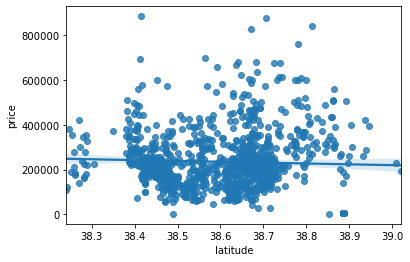

In [5]:
slope, intercept, r, p, stderr = stats.linregress(data_mod["price"], data_mod["latitude"])
print("Slope: " + str(slope))
print("Intercept: " + str(intercept))
print("r: " + str(r))
print("P-value: " + str(p))
sns.regplot(x=data_mod["latitude"],y=data_mod["price"])

Slope: 2.843039755978339e-07
Intercept: -121.42255038064008
r: 0.28448478172766434
P-value: 8.552356644185186e-20


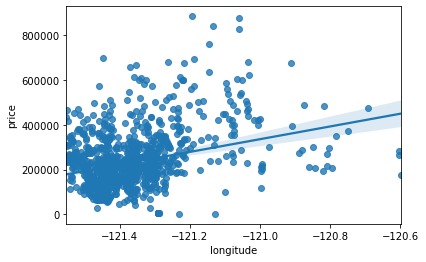

In [6]:
slope, intercept, r, p, stderr = stats.linregress(data_mod["price"], data_mod["longitude"])
print("Slope: " + str(slope))
print("Intercept: " + str(intercept))
print("r: " + str(r))
print("P-value: " + str(p))
sns.regplot(x=data_mod["longitude"],y=data_mod["price"])

Slope: 0.002058529857298544
Intercept: 832.923792993438
r: 0.333896955406177
P-value: 4.433056844561304e-27


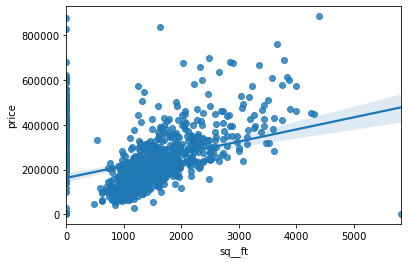

In [7]:
slope, intercept, r, p, stderr = stats.linregress(data_mod["price"], data_mod["sq__ft"])
print("Slope: " + str(slope))
print("Intercept: " + str(intercept))
print("r: " + str(r))
print("P-value: " + str(p))
sns.regplot(x=data_mod["sq__ft"],y=data_mod["price"])

Slope: 0.0038431897116160767
Intercept: 709.3325775649582
r: 0.6937079452714163
P-value: 7.670547834332482e-118


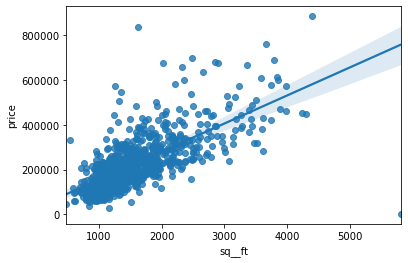

In [25]:
mask = data_mod["sq__ft"].values > 0
slope, intercept, r, p, stderr = stats.linregress(data_mod["price"][mask], data_mod["sq__ft"][mask])
print("Slope: " + str(slope))
print("Intercept: " + str(intercept))
print("r: " + str(r))
print("P-value: " + str(p))
sns.regplot(x=data_mod["sq__ft"][mask],y=data_mod["price"][mask])

## Kruskal-Wallis test

residential type and price

In [8]:
np.unique(data_mod["type"].values)

array(['Condo', 'Multi-Family', 'Residential', 'Unkown'], dtype=object)

In [9]:
samples_by_group = []
for value in set(data_mod["type"]):
    mask = data_mod["type"] == value
    samples_by_group.append(data_mod["price"][mask])

In [10]:
stat, p = stats.kruskal(*samples_by_group)
print("P-value: " + str(p))

P-value: 1.1531292565464816e-06


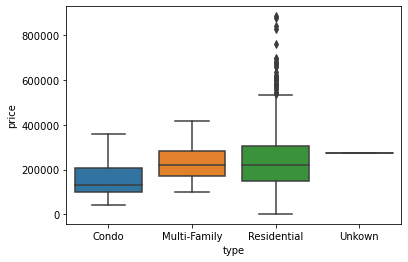

In [18]:
sns.boxplot(x=data_mod["type"], y=data_mod["price"])

Street Types type and price

In [11]:
samples_by_group = []
for value in set(data_mod["Street Types"]):
    mask = data_mod["Street Types"] == value
    samples_by_group.append(data_mod["price"][mask])

In [12]:
stat, p = stats.kruskal(*samples_by_group)
print("P-value: " + str(p))

P-value: 3.0196179902265414e-16


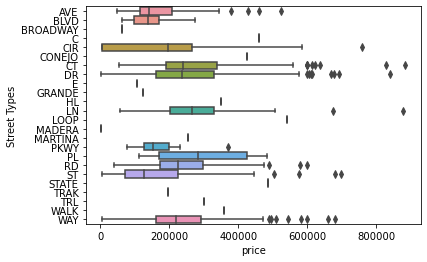

In [20]:
sns.boxplot(y=data_mod["Street Types"], x=data_mod["price"])

Beds and price

In [13]:
samples_by_group = []
for value in set(data_mod["beds"]):
    mask = data_mod["beds"] == value
    samples_by_group.append(data_mod["price"][mask])

In [14]:
stat, p = stats.kruskal(*samples_by_group)
print("P-value: " + str(p))

P-value: 9.323012566322206e-38


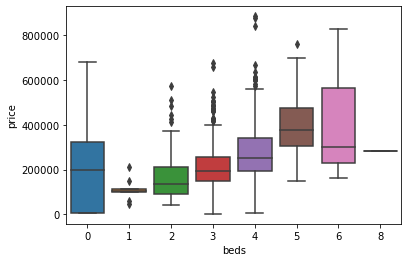

In [22]:
sns.boxplot(x=data_mod["beds"], y=data_mod["price"])

Baths and price

In [15]:
samples_by_group = []
for value in set(data_mod["baths"]):
    mask = data_mod["baths"] == value
    samples_by_group.append(data_mod["price"][mask])

In [16]:
stat, p = stats.kruskal(*samples_by_group)
print("P-value: " + str(p))

P-value: 1.1109110373679834e-50


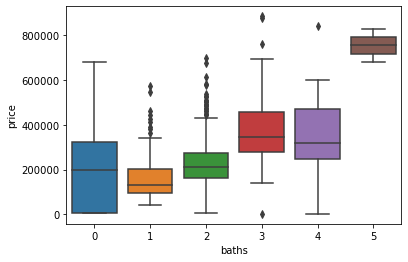

In [23]:
sns.boxplot(x=data_mod["baths"], y=data_mod["price"])

## Part VI Classification on Property Type

### Classification Numerical vs Categorical (Kruskal-Wallis)

latitude

In [11]:
samples_by_group = []
for value in set(data_mod["type"]):
    mask = data_mod["type"] == value
    samples_by_group.append(data_mod["latitude"][mask])
    
stat, p = stats.kruskal(*samples_by_group)
print("P-value: " + str(p))

P-value: 0.4933696138791226


longitude

In [12]:
samples_by_group = []
for value in set(data_mod["type"]):
    mask = data_mod["type"] == value
    samples_by_group.append(data_mod["longitude"][mask])
    
stat, p = stats.kruskal(*samples_by_group)
print("P-value: " + str(p))

P-value: 0.3574295072205312


Square footage

In [13]:
samples_by_group = []
for value in set(data_mod["type"]):
    mask = data_mod["type"] == value
    samples_by_group.append(data_mod["sq__ft"][mask])
    
stat, p = stats.kruskal(*samples_by_group)
print("P-value: " + str(p))

P-value: 3.849635133463987e-12


### Classification Categorical vs Categorical (Chi-Squared test of independence)

Type-Street Type

In [14]:
combination_counts = data_mod[["type","Street Types"]].groupby(by=["type","Street Types"]).size().unstack(level=0)
combination_counts

type,Condo,Multi-Family,Residential,Unkown
Street Types,,,,
AVE,1,1,72,0
BLVD,4,1,8,0
BROADWAY,0,0,1,0
C,0,0,1,0
CIR,2,2,108,0
CONEJO,0,0,1,0
CT,4,1,121,0
DR,20,1,150,0
E,1,0,0,0


In [15]:
chi2, p, _, _ = stats.chi2_contingency(combination_counts) 
print("P-value - " + str(p))

P-value - 2.7829929496109202e-14


Type-City

In [16]:
combination_counts = data_mod[["type","city"]].groupby(by=["type","city"]).size().unstack(level=0)
chi2, p, _, _ = stats.chi2_contingency(combination_counts) 
print("P-value - " + str(p))

P-value - 6.884142190454073e-149


Type-State

In [17]:
combination_counts = data_mod[["type","state"]].groupby(by=["type","state"]).size().unstack(level=0)
chi2, p, _, _ = stats.chi2_contingency(combination_counts) 
print("P-value - " + str(p))

P-value - 1.0


Type-Zip

In [18]:
combination_counts = data_mod[["type","zip"]].groupby(by=["type","zip"]).size().unstack(level=0)
chi2, p, _, _ = stats.chi2_contingency(combination_counts) 
print("P-value - " + str(p))

P-value - 6.195871832483889e-06


Type-Beds

In [19]:
combination_counts = data_mod[["type","baths"]].groupby(by=["type","baths"]).size().unstack(level=0)
chi2, p, _, _ = stats.chi2_contingency(combination_counts) 
print("P-value - " + str(p))

P-value - 2.225837221388893e-41


Type-Baths

In [20]:
combination_counts = data_mod[["type","beds"]].groupby(by=["type","beds"]).size().unstack(level=0)
chi2, p, _, _ = stats.chi2_contingency(combination_counts) 
print("P-value - " + str(p))

P-value - 1.6090894896930032e-64
